In [ ]:
# Enable interactive plot
# %matplotlib notebook

In [6]:
import serial
import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import numpy as np
import threading
from itertools import count
import time
from scipy.signal import find_peaks, butter, filtfilt

In [7]:
timeout = 5
def update_data():
    s = serial.Serial(port='COM7', baudrate=115200)
    sensor_data = [[], [], []]
    t_start = time.time()
    s.flush()
    while time.time() <= t_start + timeout:
        data = list(s.readline().decode("utf-8").rstrip().split(','))
        temp_data = [int(i) for i in data]
        for i in range(len(temp_data)):
            sensor_data[i].append(temp_data[i])
    s.close()
    return sensor_data

351
351


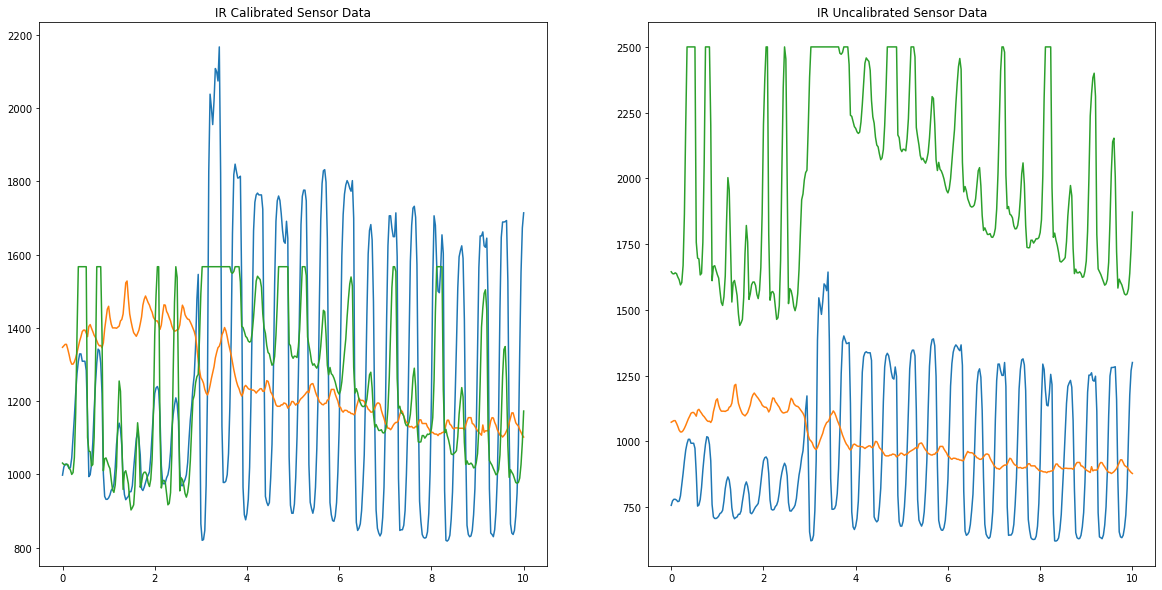

In [11]:
sensor_data = update_data()

sensor_data = np.array(sensor_data)
sensor_avg = np.average(sensor_data, axis = 1)		# average of each row
sensor_const = 1250 / sensor_avg					# calibrate data to middle point (2500/2)

# Calibrate data with constant
sensor_cal = np.copy(sensor_data)
for i in range(len(sensor_const)):
	sensor_cal[i] = sensor_cal[i] * sensor_const[i]

plt.figure(figsize = (20, 10))
plt.subplot(121)
t = np.linspace(0, 10, len(sensor_cal[0]))
plt.title("IR Calibrated Sensor Data")
for i in sensor_cal:
	plt.plot(t, i)
plt.subplot(122)
plt.title("IR Uncalibrated Sensor Data")
for i in sensor_data:
	plt.plot(t, i)
print(len(sensor_cal[0]))
print(len(sensor_data[0]))

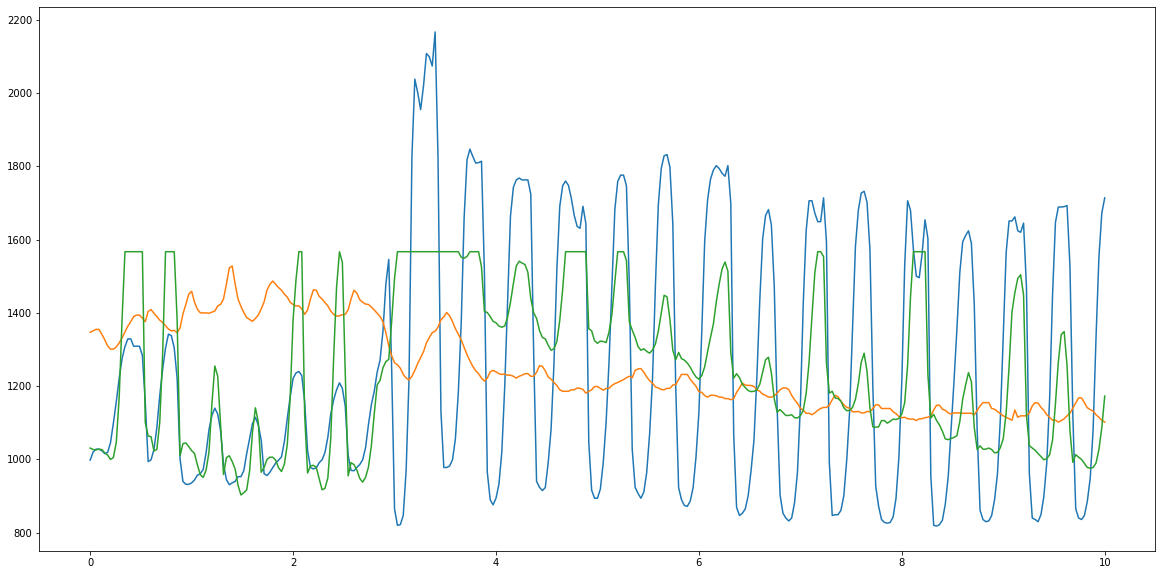

In [12]:
fs = len(sensor_cal[0]) / timeout
b, a = butter(3, 0.048, 'low')
filtered = np.copy(sensor_cal)
for i in filtered:
    i = filtfilt(b, a, i)

plt.figure(figsize = (20, 10))
for i in filtered:
    plt.plot(t, i)